This example shows how to interpolate the fMRI timecourse if the stimulus
duration is not equal to the duration of the TR. Imagine that there are 
100 TRs and each lasts for 1s, while your stimulus duration is only 0.5s
The stimulus starts with the TR onset. To correctly code the stimulus 
onset in your design matrix you need 200 rows in your design matrix 
(but you only have 100 fMRI volumes). Interpolation of the timecourse is 
necessary to match the size of rows in your design matrix. 

In [116]:
import numpy as np
import scipy as sc
import glmsingle
import matplotlib.pyplot as plt
import pandas as pd
from pyslicetime.slicetime.tseriesinterp import tseriesinterp


In [87]:
TRs = 100
TR = 1
stimdur = 0.5
TRs_after_resampling = int(TR/stimdur*TRs)



In [119]:
# Use an example hrf and create two example fMRI time series.
cond1 = np.zeros([TRs,1])
cond2 = np.zeros([TRs,1])


cond1[[10,50]] = 1
cond2[[30,60]] = 1



hrf = glmsingle.glmsingle.getcanonicalhrf(stimdur,TR)

tcs = np.convolve(cond1[:,0],hrf)
tcs = tcs[0:len(cond1)]
tcs2 = np.convolve(cond2[:,0],hrf)
tcs2 = tcs2[0:len(cond2)]

cond1 = (cond1[:,0])
cond2 = (cond2[:,0])

tcs = (tcs,tcs2)

tcs = pd.Series(tcs)

tcs

0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
dtype: object

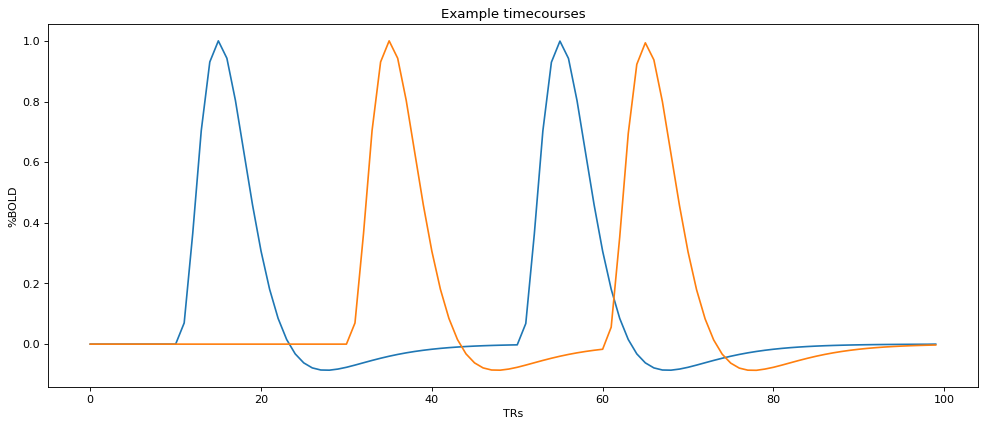

In [123]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(tcs[0])
plt.plot(tcs[1])
plt.xlabel('TRs')
plt.ylabel('%BOLD')
plt.title('Example timecourses')
plt.show()


# Resample

In [148]:
# The following line resmaples the timecourse so that each timepoint will
# correspond to 0.5 s instead of 1 s. 

# tseriesinterp
tcs =np.array((tcs))

x = np.linspace(0, np.shape(tcs)[1], num=100, endpoint=True)
f = sc.interpolate.interp1d(x,tcs)
x_new = np.linspace(0, np.shape(tcs)[1], num=TRs_after_resampling, endpoint=True)

tcs_interp = f(x_new)

plt.figure(figsize=(15, 6), dpi=80)


plt.plot(x, np.transpose(tcs),'x')
plt.plot(x_new, np.transpose(tcs_interp),'o')



# Notice that the lenght of the tcs_interp is double the length of tcs.

# With an interpolated timecourse now you can code your design matrix
# correctly. The design matrix is going to consist of 200 columns were 1 will
# specify the stimulus onset. Remember to specify the stimduration for
# GLMsingle as 0.5 s instead of 1 s.

print(np.shape(tcs))
print(np.shape(tcs_interp))



IndexError: tuple index out of range

In [112]:
len(x)

100

In [7]:
tcs = (np.reshape(tcs,[2,1,100]))
#help(tseriesinterp)
np.shape(tcs)
m = tcs
msize = np.asarray(m.shape)
msize
len(msize) > 1
dim = len(m.shape)-1


mflat = reshape2D(m, dim)
np.shape(mflat)
numsamples = int(np.ceil((mflat.shape[0]*1)/0.5))
numsamples
#y1 = tseriesinterp(tcs,1,0.5);
numsamples
tcs_interp = tseriesinterp(tcs,1,0.5)

np.shape(tcs_interp)

(2, 1, 200)

In [14]:
timeorig = \
[0.0 + x*(1*mflat.shape[0])/len(mflat)
                for x in range(len(mflat))]


timenew = \
[0.0 + x*(0.5*numsamples)/numsamples 
                for x in range(int(numsamples))]
fakeout = 1
timenew = [0.0 + x*(0.5*numsamples) /
               numsamples - fakeout for x in range(int(numsamples))] 

timenew

[-1.0,
 -0.5,
 0.0,
 0.5,
 1.0,
 1.5,
 2.0,
 2.5,
 3.0,
 3.5,
 4.0,
 4.5,
 5.0,
 5.5,
 6.0,
 6.5,
 7.0,
 7.5,
 8.0,
 8.5,
 9.0,
 9.5,
 10.0,
 10.5,
 11.0,
 11.5,
 12.0,
 12.5,
 13.0,
 13.5,
 14.0,
 14.5,
 15.0,
 15.5,
 16.0,
 16.5,
 17.0,
 17.5,
 18.0,
 18.5,
 19.0,
 19.5,
 20.0,
 20.5,
 21.0,
 21.5,
 22.0,
 22.5,
 23.0,
 23.5,
 24.0,
 24.5,
 25.0,
 25.5,
 26.0,
 26.5,
 27.0,
 27.5,
 28.0,
 28.5,
 29.0,
 29.5,
 30.0,
 30.5,
 31.0,
 31.5,
 32.0,
 32.5,
 33.0,
 33.5,
 34.0,
 34.5,
 35.0,
 35.5,
 36.0,
 36.5,
 37.0,
 37.5,
 38.0,
 38.5,
 39.0,
 39.5,
 40.0,
 40.5,
 41.0,
 41.5,
 42.0,
 42.5,
 43.0,
 43.5,
 44.0,
 44.5,
 45.0,
 45.5,
 46.0,
 46.5,
 47.0,
 47.5,
 48.0,
 48.5,
 49.0,
 49.5,
 50.0,
 50.5,
 51.0,
 51.5,
 52.0,
 52.5,
 53.0,
 53.5,
 54.0,
 54.5,
 55.0,
 55.5,
 56.0,
 56.5,
 57.0,
 57.5,
 58.0,
 58.5,
 59.0,
 59.5,
 60.0,
 60.5,
 61.0,
 61.5,
 62.0,
 62.5,
 63.0,
 63.5,
 64.0,
 64.5,
 65.0,
 65.5,
 66.0,
 66.5,
 67.0,
 67.5,
 68.0,
 68.5,
 69.0,
 69.5,
 70.0,
 70.5,
 71.0,
 71.5

In [9]:
range(int(numsamples))
numsamples

numsamples
for x in range(int(numsamples)) - fakeout:
    print(x)

NameError: name 'fakeout' is not defined